# 🧪 Toy Example: Using CNNs

In [3]:
import tensorflow as tf
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/Users/michelgonzagadossantos/Documents/Repositories/Data-Science/Credit Risk/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Packages version
print(f'tensorflow: {tf.__version__}')
print(f'sklearn: {sklearn.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {matplotlib.__version__}')

tensorflow: 2.19.0
sklearn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.9.4


## 👤 Author

**Michel Gonzaga dos Santos**  
*Fortaleza, June 2021*

---

- 📐 Input Shape

- `[64, 250, 250, 3]`
  - `[batch_size, height, width, channels]`

---

- ⚙️ Batch vs Stochastic Gradient Descent (SGD)
-  ✅ Batch (SGD)

- **X = [x₁, x₂, x₃, ..., xₙ]**
- Steps:
  - X₁ → Model → Update
  - X₂ → Model → Update
  - ...

- ✅ Batch Gradient Descent (BGD)

- Steps:
  - X₁ → Model → Sum()
  - X₂ → Model → Sum()
  - ...
  - Xₙ → Model → Sum()
  - **Sum all and divide.**
  - **Update**

---

- 🧭 CNN Architecture Flow

- `[img]` → `[Conv]` → `[Pooling]` → ... → `[Conv]` → `[Pooling]` → `[Flatten]` → **Classifier**  
  - *Classifier Examples:* Perceptron, MLP, Neural Network
  - **Classifier Input:** Vector
  - **Classifier Output:** Prediction

---

- 🔎 CNN Output

- **Features vectors → Pluridimensional**
- **Flatten:** Vectorizes the data


In [8]:
# Here we download the MNIST dataset, which is composed of a training set with 60,000 images and a test set with 10,000 images.
# The images contain handwritten digits, and our goal is to associate each image with the correct number.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step


In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

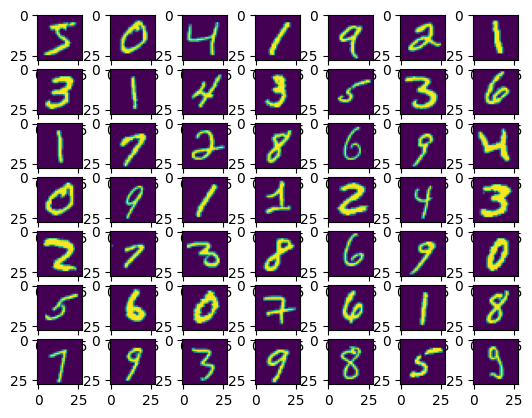

In [10]:
fig, ax = plt.subplots(7,7)
for i in range(7):
  for j in range(7):
    ax[i,j].imshow(X_train[i*7+j][:,:,0])

plt.show()

In [7]:
X_train.shape

(60000, 28, 28, 1)

<Axes: ylabel='count'>

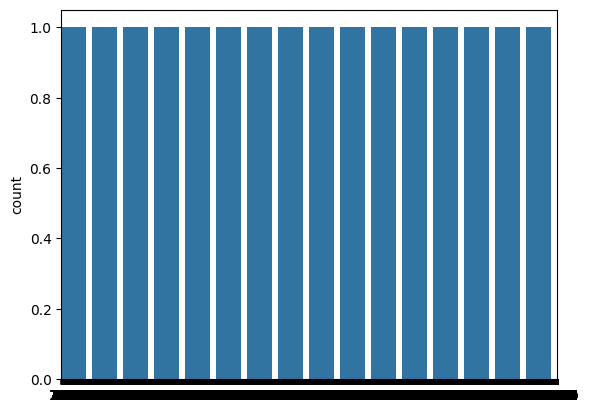

In [11]:
sns.countplot(y_train)
# We have 10 classes of Numbers

In [12]:
n_classes = 10

Y_train = tf.keras.utils.to_categorical(y_train,n_classes)
Y_test = tf.keras.utils.to_categorical(y_test,n_classes)

In [13]:
model = tf.keras.models.Sequential()
# aqui instanciamos o modelo

#input (28,28,1)
#output (none,26,26,32)
model.add(
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1))
)
#input (none,26,26,32)
#output (none,24,24,32)
model.add(
    tf.keras.layers.MaxPool2D(pool_size=(1,1))
)
#input (none,24,24,32)
#output (none,22,22,32)
model.add(
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')
)
#input (none,22,22,32)
#output (none,20,20,32)
model.add(
    tf.keras.layers.MaxPool2D(pool_size=(1,1))
)

# -------------------- Classifier -----------------------

# Flatten() -> hidden layer with 128 neurons -> output layer with 10 neurons(softmax)

#input (none,20,20,32)
#output (none,12800)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
# n_classes = 10. Digitis from 0 to 9
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

/Users/michelgonzagadossantos/Documents/Repositories/Data-Science/Credit Risk/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,370,282 (9.04 MB)

 Trainable params: 2,370,282 (9.04 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=128, # [X1, X2, ... X128] -> Update, [X128, X129, ... X256] -> Update, ...
    epochs=3,
    validation_data=(
        X_test, Y_test
    )
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - categorical_accuracy: 0.8268 - loss: 6.2620 - val_categorical_accuracy: 0.9736 - val_loss: 0.0853
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - categorical_accuracy: 0.9837 - loss: 0.0522 - val_categorical_accuracy: 0.9762 - val_loss: 0.0771
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - categorical_accuracy: 0.9922 - loss: 0.0245 - val_categorical_accuracy: 0.9786 - val_loss: 0.0781


In [17]:
training_loss = history.history['loss']
validation_loss =  history.history['val_loss']

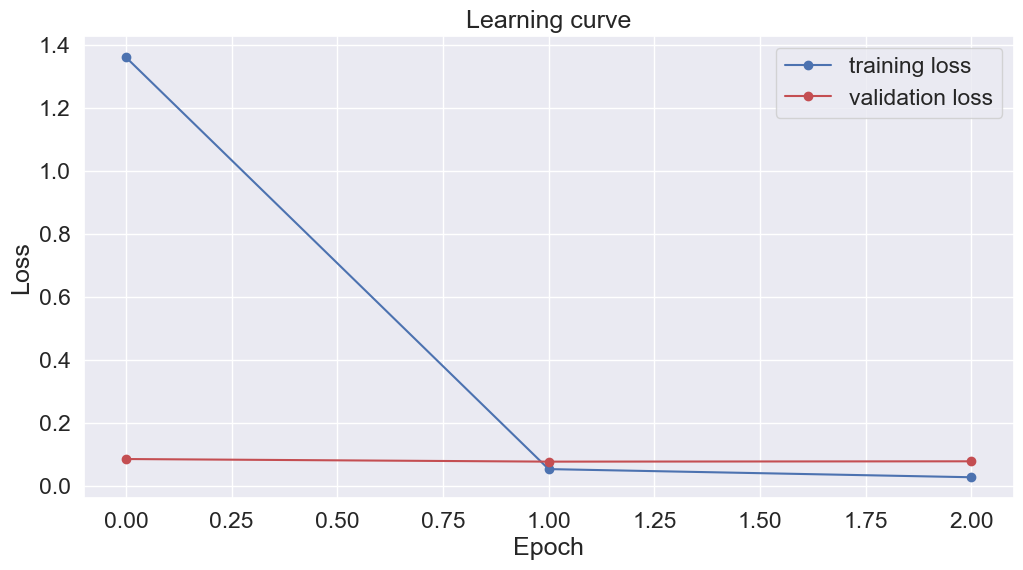

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(training_loss, 'b-o', label="training loss")
plt.plot(validation_loss, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [21]:
Y_test_pred = model.predict(X_test)
Y_test_pred = [y.argmax() for y in Y_test_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



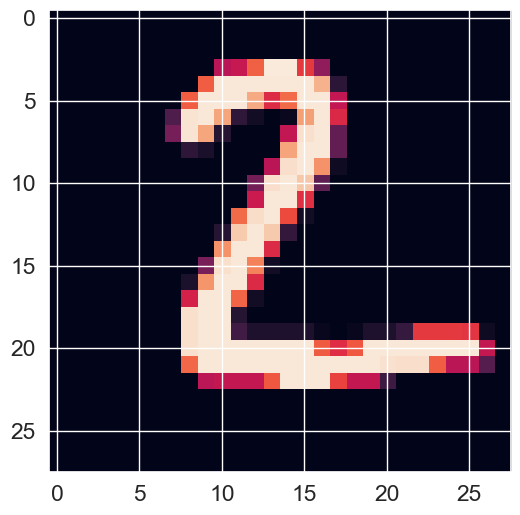

In [23]:
plt.imshow(X_test[1].reshape(28,28))